# Two-layer Neural Network Workbook for CS145 Homework 3

----
<span style="color:red">**PRINT YOUR NAME AND UID HERE!**</span>

NAME: SINGH, PRABHJOT UID: 304956577

----


Please follow the notebook linearly to implement a two layer neural network.

Please print out the workbook entirely when completed.

The goal of this workbook is to give you experience with training a two layer neural network.

---

Import libraries and define relative error function, which is used to check results later. 

In [111]:
import random
import numpy as np
from cs145.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass.

In [112]:
from lib.neural_net import TwoLayerNet

In [113]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [114]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231233889892e-08


### Forward pass loss

The total loss includes data loss (MSE) and regularization loss, which is,

$$L = L_{data}+L_{reg} = \frac{1}{2N}\sum_{i=1}^{N}\left(\boldsymbol{y}_{\text{pred}}-\boldsymbol{y}_{\text{target}}\right)^2 + \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

More specifically in multi-class situation, if the output of neural nets from one sample is $y_{\text{pred}}=(0.1,0.1,0.8)$ and $y_{\text{target}}=(0,0,1)$ from the given label, then the MSE error will be $Error=(0.1-0)^2+(0.1-0)^2+(0.8-1)^2=0.06$

Implement data loss and regularization loss. In the MSE function, you also need to return the gradients which need to be passed backward. This is similar to batch gradient in linear regression. Test your implementation of loss functions. The Difference should be less than 1e-12.

In [115]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss_MSE = 1.8973332763705641 # check this number

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss_MSE)))

Difference between your loss and correct loss:
0.0


### Backward pass (You do not need to implemented this part)

We have already implemented the backwards pass of the neural network for you.  Run the block of code to check your gradients with the gradient check utilities provided. The results should be automatically correct (tiny relative error).

If there is a gradient error larger than 1e-8, the training for neural networks later will be negatively affected.

In [116]:
from cs145.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 8.80091875172355e-11
b2 max relative error: 2.4554844805570154e-11
W1 max relative error: 1.7476665046687833e-09
b1 max relative error: 7.382451041178829e-10


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the linear regression.

Final training loss:  0.029505556262068168


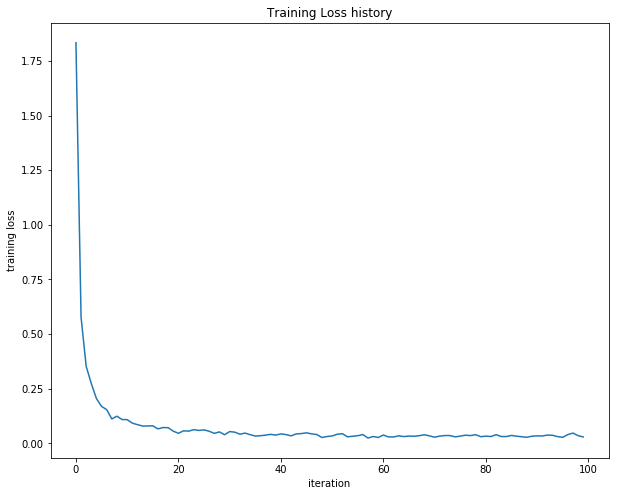

In [117]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [118]:
from cs145.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = './cs145/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 15-18%.

In [119]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-5, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 0.5000623457905098
iteration 100 / 1000: loss 0.4998246529435278
iteration 200 / 1000: loss 0.4995946718475304
iteration 300 / 1000: loss 0.49933536166627984
iteration 400 / 1000: loss 0.4989962372581251
iteration 500 / 1000: loss 0.49847178744773624
iteration 600 / 1000: loss 0.49758927830530253
iteration 700 / 1000: loss 0.4966248113033766
iteration 800 / 1000: loss 0.4958001901438695
iteration 900 / 1000: loss 0.4939583435911163
Validation accuracy:  0.172


In [120]:
stats['train_acc_history']

[0.09, 0.15, 0.225, 0.195, 0.225]

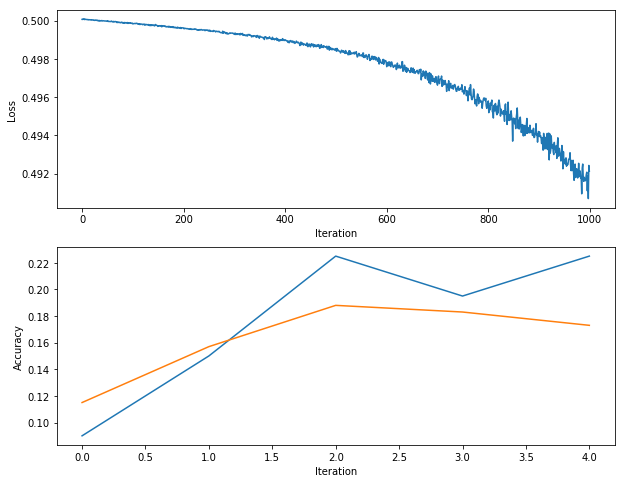

In [121]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.show()

### Questions:

The training accuracy isn't great. It seems even worse than simple KNN model, which is not as good as expected.

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?

### Answers:

(1) The difference between training accuracy and validation accuracy is not that great, suggesting that our data set might be too small. A bigger data set might give us more overfitting, increasing the gap between training accuracy and validation accuracy. Furthermore, The rate which loss is decresing suggests that our learning rate might be too low.

(2) Well, we can defintelely increase the size of the model for one. Second, we try to tune the hyperparameters to see which ones give us the best accuracy. E.g: change values of hidden layer size, learning rate, numer of iterations, and regularization to see which combination gives us the most accurate results. 

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [138]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 45% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 23%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

# todo: optimal parameter search (you can use grid search by for-loops )

input_size = 32 * 32 * 3 # do not change
hidden_size = 50 # do not change
num_classes = 10 # do not change
best_valacc = 0

# Train the network and find best parameter: 
learning_rates = [5e-4, 3e-4, 3e-3, 1e-3] 
regularization = [0, 0.25, 0.5, 0.75, 1]
learning_decays = [0.95, 0.96, 0.97, 0.98, 0.99]
results = {} # To make it easier to visualize the results

for curr_learning_rate in learning_rates:
    for curr_regularization in regularization:
        for curr_learning_decay in learning_decays:
            
            current_net = TwoLayerNet(input_size, hidden_size, num_classes)
            current_net.train(X_train, y_train, X_val, y_val, learning_rate = curr_learning_rate, 
                              learning_rate_decay = curr_learning_decay, reg = curr_regularization, num_iters = 1500)
            y_train_predict = current_net.predict(X_train)
            y_val_predict = current_net.predict(X_val)

            validationAcc = np.mean(y_val_predict == y_val)
            results[(curr_learning_rate, curr_regularization, curr_learning_decay)] = validationAcc

            if validationAcc > best_valacc:
                best_valacc = validationAcc
                best_net = current_net

# Print out results.
for lr, reg, lrD in sorted(results):
    validationAcc = results[(lr, reg, lrD)]
    print ("Learning Rate:", lr, "Regularization:", reg,"Learning Rate Decay:", lrD, "Validation Accuracy:", validationAcc)



# Output your results
print("== Best parameter settings ==")
# print your best parameter setting here!
print("Best accuracy on validation set: {}".format(best_valacc))
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

C:\Users\princ\Desktop\Homework 3\lib\neural_net.py:156: RuntimeWarning: overflow encountered in multiply
  reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
C:\Users\princ\Desktop\Homework 3\lib\neural_net.py:156: RuntimeWarning: invalid value encountered in double_scalars
  reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
C:\Users\princ\Desktop\Homework 3\lib\neural_net.py:175: RuntimeWarning: invalid value encountered in multiply
  dh = (dscore.dot(W2) * da_h)
C:\Users\princ\Desktop\Homework 3\lib\neural_net.py:92: RuntimeWarning: invalid value encountered in maximum
  a2 = np.maximum(h1, a2)
C:\Users\princ\Desktop\Homework 3\lib\neural_net.py:174: RuntimeWarning: invalid value encountered in greater
  da_h[h1>0] = 1
C:\Users\princ\Desktop\Homework 3\lib\neural_net.py:292: RuntimeWarning: invalid value encountered in maximum
  h1 = np.maximum( X.dot(self.params['W1'].T) + self.params['b1'], 0 )
C:\Users\princ\Desktop\Homework 3\lib\neural_net.p

Learning Rate: 0.0003 Regularization: 0 Learning Rate Decay: 0.95 Validation Accuracy: 0.467
Learning Rate: 0.0003 Regularization: 0 Learning Rate Decay: 0.96 Validation Accuracy: 0.462
Learning Rate: 0.0003 Regularization: 0 Learning Rate Decay: 0.97 Validation Accuracy: 0.466
Learning Rate: 0.0003 Regularization: 0 Learning Rate Decay: 0.98 Validation Accuracy: 0.459
Learning Rate: 0.0003 Regularization: 0 Learning Rate Decay: 0.99 Validation Accuracy: 0.452
Learning Rate: 0.0003 Regularization: 0.25 Learning Rate Decay: 0.95 Validation Accuracy: 0.452
Learning Rate: 0.0003 Regularization: 0.25 Learning Rate Decay: 0.96 Validation Accuracy: 0.455
Learning Rate: 0.0003 Regularization: 0.25 Learning Rate Decay: 0.97 Validation Accuracy: 0.457
Learning Rate: 0.0003 Regularization: 0.25 Learning Rate Decay: 0.98 Validation Accuracy: 0.459
Learning Rate: 0.0003 Regularization: 0.25 Learning Rate Decay: 0.99 Validation Accuracy: 0.453
Learning Rate: 0.0003 Regularization: 0.5 Learning Rate

### Quesions

(1) What is your best parameter settings? (Output from the previous cell)

(2) What parameters did you tune? How are they changing the performance of nerural network? You can discuss any observations from the optimization.

### Answers

(1) The best accuracy I got from tuning the parameters was 0.493 using the following parameters: 

    Learning Rate: 0.001 Regularization: 0 Learning Rate Decay: 0.98

(2) The parameters I changed were Learning rate, Learning Rate Decay and Regularization. 
    The Learning Rates I used were: [5e-4, 3e-4, 3e-3, 1e-3] 
    Regularization Strengths were: [0, 0.25, 0.5, 0.75, 1]
    Learning Rate Decays were: [0.95, 0.96, 0.97, 0.98, 0.99]
    
Overall, it seemed like accuracy improved on two extremes of Regularization. Either the lower the regularization, the better the accuracy or the higher the regularization, the better the accuracy. Learning Rate Decay's sweet spot seemed to be around 0.97 or 0.98. 0.95 or 0.99 did not work too well in my tests. I ran tests in which learning rate varied far more to find the sweet spot. Once I did, I reduced that number down to 4 rates and implemented learning rate decays. Otherwise, I would've probably needed more than a week to run all the tests (darn you, nested for loops!). 

## Visualize the weights of your neural networks

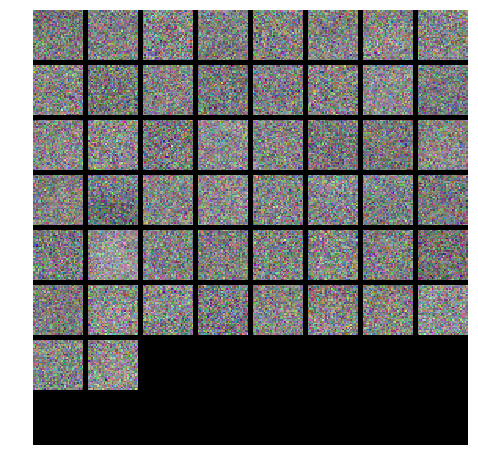

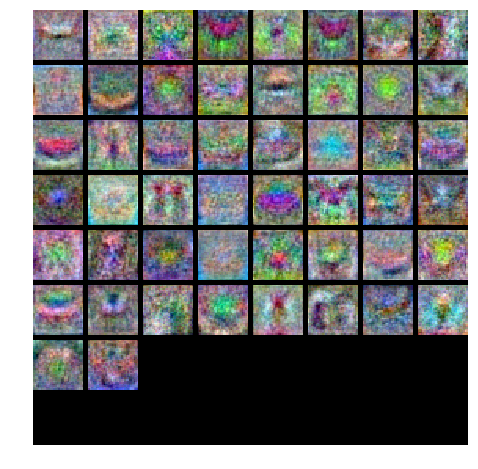

In [142]:
from cs145.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

### Questions:

What differences do you see in the weights between the suboptimal net and the best net you arrived at? What do the weights in neural networks probably learn after training?

### Answer:


The suboptimal weights are practically undistinguishable and beyond recognition. The best net's weights with validation accuracy hovering around 0.50, we can begin to recognize some, not all, of the figures in the images. 

## Evaluate on test set 

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
#test_acc = (subopt_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

### Questions:
(1) What is your test accuracy by using the best NN you have got? How much does the performance increase compared with kNN? Why can neural networks perform better than kNN?

(2) Do you have any other ideas or suggestions to further improve the performance of neural networks other than the parameters you have tried in the homework? 

### Answers:

(1) The best NN gives an accuracy of 0.493. The kNN's best effort was 1 - error = 1 - 0.718 = 0.282. That's 21.1% more accurate! That number might seem small but it's a big improvement in the data mining world. While kNN is intuitive and simple to implement, it can be very computationally expensive to perform on a large data set. NN, though take a long time to train, can have very minimal times for classifying.

(2)

## Bonus Question: Change MSE Loss to Cross Entropy Loss

This is a bonus question. If you finish this (cross entropy loss) correctly, you will get **up to 20 points** (add up to your HW3 score). 

Note: From grading policy of this course, your maximum points from homework are still 25 out of 100, but you can use the bonus question to make up other deduction of other assignments.

Pass output scores in networks from forward pass into softmax function. The softmax function is defined as,
$$p_j = \sigma(z_j) = \frac{e^{z_j}}{\sum_{c=1}^{C} e^{z_c}}$$
After softmax, the scores can be considered as probability of $j$-th class.

The cross entropy loss is defined as,
$$L = L_{\text{CE}}+L_{reg} = \frac{1}{N}\sum_{i=1}^{N} \log \left(p_{i,j}\right)+ \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

To take derivative of this loss, you will get the gradient as,
$$\frac{\partial L_{\text{CE}}}{\partial o_i} = p_i - y_i $$

More details about multi-class cross entropy loss, please check [http://cs231n.github.io/linear-classify/](http://cs231n.github.io/linear-classify/) and [more explanation](https://deepnotes.io/softmax-crossentropy) about the derivative of cross entropy.

Change the loss from MSE to cross entropy, you only need to change you ```MSE_loss(x,y)``` in ```TwoLayerNet.loss()``` function to ```softmax_loss(x,y)```.

**Now you are free to use any code to show your results of the two-layer networks with newly-implemented cross entropy loss. You can use code from previous cells.**

In [ ]:
# Start training your networks and show your results